# Introdução

## Importando bibliotecas e lendo os dados 

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Carregando os dados
df = pd.read_csv('nba_treino.csv')

# Selecionando apenas os atributos para o k-Means
atributos_selecionados = ['FTA', 'REB']
X = df[atributos_selecionados]

Não fiz redução de dimensionalidade nesse código, mas poderia ter sido feita. Porém selecionei atributos que achei que iriam ser interessantes de separar, por isso usei o pairplot

# Código

In [28]:
# sns.pairplot(df)

Função para inicializar centróides aleatórios

In [29]:
def inicializar_centroides(X, k):
    indices_aleatorios = np.random.choice(X.shape[0], k, replace=False)
    return X.iloc[indices_aleatorios].to_numpy()

Função para calcular a distância euclidiana entre dois pontos, mesma do código do KNN

In [30]:
def distancia_euclidiana(ponto1, ponto2):
    return np.sqrt(np.sum((ponto1 - ponto2) ** 2))

Essa função implementa a atribuição de pontos de dados a clusters em um algoritmo de agrupamento usando centroides. Ela recebe uma matriz de dados X e um conjunto de centroides, calcula a distância euclidiana de cada ponto de dados aos centroides e atribui cada ponto ao cluster representado pelo centróide mais próximo. O resultado é um array que indica a que cluster cada ponto de dados pertence.

In [31]:
def atribuir_aos_clusters(X, centroides):
    clusters = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        distancias = [distancia_euclidiana(X.iloc[i].to_numpy(), centroide) for centroide in centroides]
        clusters[i] = np.argmin(distancias)
    return clusters

Essa função implementa a atualização dos centroides em um algoritmo de agrupamento k-means. Ela recebe uma matriz de dados X, um array que indica a que cluster cada ponto de dados pertence (clusters), e o número de clusters (k). A função calcula os novos centroides atribuindo a média dos pontos de dados em cada cluster aos centroides correspondentes. Se um cluster não tiver membros, o centróide para esse cluster permanece inalterado. O resultado é um array representando os novos centroides para cada cluster.

In [32]:
def atualizar_centroides(X, clusters, k):
    centroides = np.zeros((k, X.shape[1]))
    for j in range(k):
        membros_cluster = X[clusters == j]
        if len(membros_cluster) > 0:
            centroides[j] = membros_cluster.mean(axis=0)
    return centroides

Função principal do k-Means

In [33]:
def kmeans(X, k, max_iter=100):
    centroides = inicializar_centroides(X, k)
    
    for _ in range(max_iter):
        clusters = atribuir_aos_clusters(X, centroides)
        novos_centroides = atualizar_centroides(X, clusters, k)
        
        # Verificar convergência
        if np.all(centroides == novos_centroides):
            break
        
        centroides = novos_centroides
    
    return clusters, centroides

Apenas uma função auxiliar para visualizarmos os dados

In [34]:
# Função para visualizar os resultados
def visualizar_resultados(X, clusters, centroides, k):
    # Adicionando coluna 'Cluster' ao DataFrame original
    df['Cluster'] = clusters
    
    # Visualizando os centróides
    print(f'\nCentróides para k={k}:\n{centroides}\n')

    # Visualizando a distribuição dos clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=df['Cluster'], palette='viridis', s=50, legend='full')
    plt.scatter(centroides[:, 0], centroides[:, 1], marker='X', s=200, color='red', label='Centróides')
    plt.title(f'k-Means com k={k}')
    plt.xlabel(atributos_selecionados[0])
    plt.ylabel(atributos_selecionados[1])
    plt.legend()
    plt.show()


Centróides para k=2:
[[3.3662963  5.96555556]
 [1.32593516 2.10623441]]



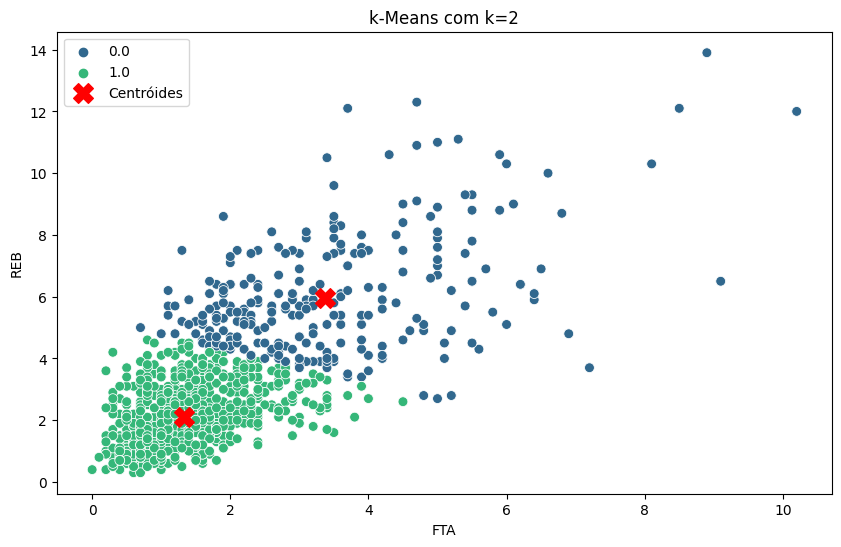


Centróides para k=3:
[[2.29747191 4.12724719]
 [4.58613861 7.75346535]
 [1.12390244 1.70325203]]



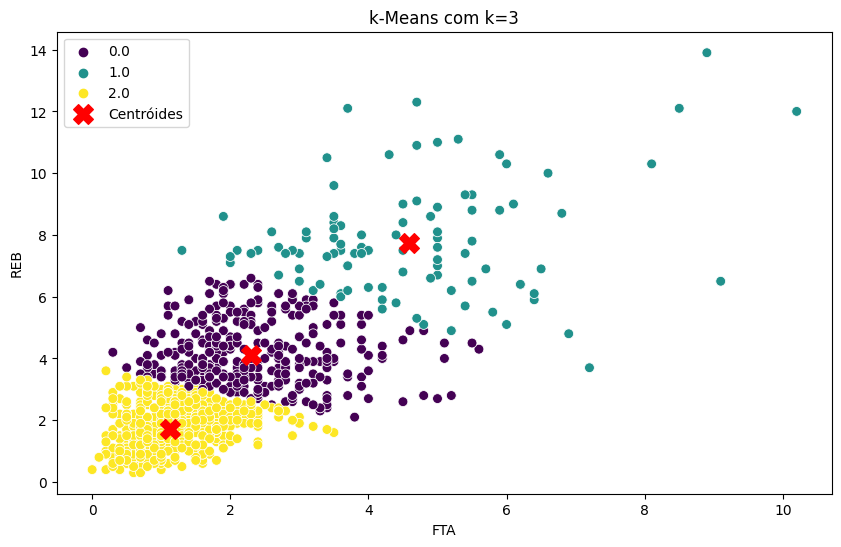

In [35]:
# Testando o k-Means com diferentes valores de k
valores_k = [2, 3]
for k in valores_k:
    clusters, centroides = kmeans(X, k)
    visualizar_resultados(X, clusters, centroides, k)

Aqui fazemos a mesma coisa porém usando o SKLearn

In [36]:
#Extra
from sklearn.cluster import KMeans
def kmeans_SKLearn(X, k):
    # Criando o modelo k-Means
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Treinando o modelo
    kmeans.fit(X)
    
    # Obtendo os centróides dos clusters
    centroides = kmeans.cluster_centers_
    
    # Adicionando coluna 'Cluster' ao DataFrame original
    df['Cluster'] = kmeans.labels_
    
    visualizar_resultados(X, clusters, centroides, k)


Centróides para k=2:
[[1.37064439 2.19343675]
 [3.52008547 6.24700855]]



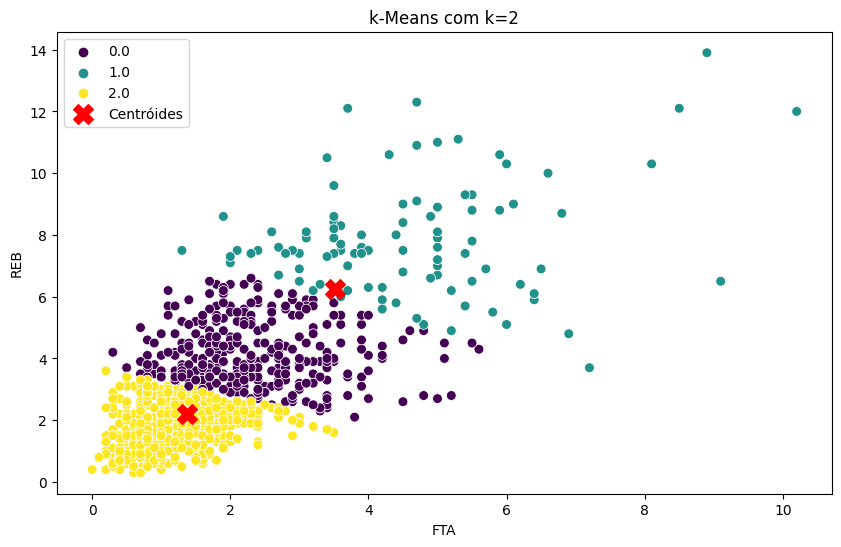


Centróides para k=3:
[[1.12390244 1.70325203]
 [4.58613861 7.75346535]
 [2.29747191 4.12724719]]



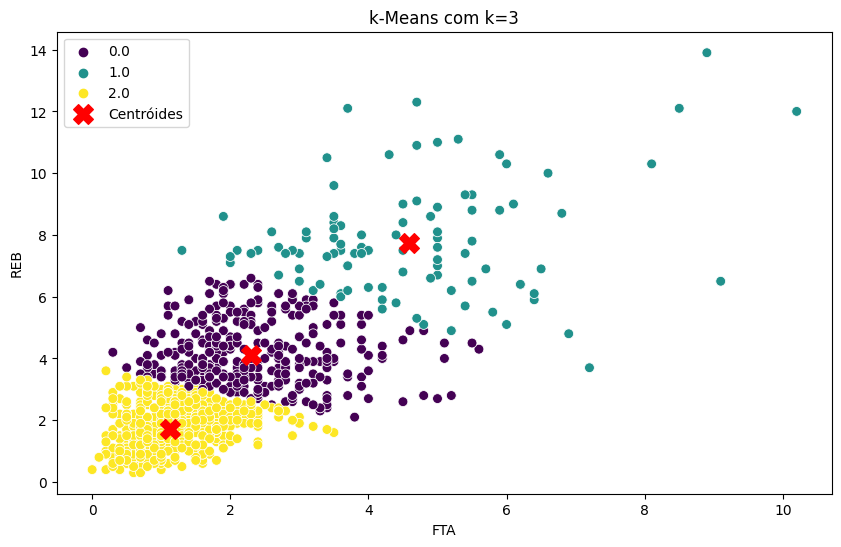

In [37]:
# Testando o k-Means do SKlearn com diferentes valores de k
valores_k = [2, 3]
for k in valores_k:
    kmeans_SKLearn(X, k)

# Discussões

Bom, nesse código eu plotei os gráficos para que a visualização dos fique evidente. Além disso, gostaria de falar que para ver o algoritmo funcionando para outros atributos, basta alterar no início do arquivo.
No mais acredito que ficou bem parecido com o SKLearn e teve uma pequena divergência apenas nos centroides